# Orders Analysis
**Sharathchandra BM**

Libraries used

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

Data is read into for processing

In [2]:
data = pd.read_csv("C:/Users/Sharathchandra/Desktop/Skill Assessment/Klaviyo/screening_exercise_orders_v201810.csv")
data = pd.DataFrame(data)

Questions asked and answered below with code chunks.

*Assemble a dataframe with one row per customer and the following columns:* 
customer_id
gender
most_recent_order_date
order_count (number of orders placed by this customer) Sort the dataframe by customer_id ascending and display the first 10 rows.

*Answer:* 
There were rows which were multiple transactions (orders) done by customer with different time stamps. They had to be grouped by customer_id, order_count columns contains number of orders done and most_recent_order_date i.e. recent transaction time stamp of order is taken. The dataframe is sorted in ascending order and only first 10 rows are displayed in this notebook.

In [3]:
customerOrderCount = data.groupby(['customer_id','gender']).aggregate({"date":['max'],"customer_id":['count']})
customerOrderCount.rename(columns={'customer_id': 'customer_id','gender': 'gender','date': 'most_recent_order_date','customer_id': 'order_count'}, inplace=True)
customerOrderCount.head(10)

,,most_recent_order_date,order_count
,,max,count
customer_id,gender,,
1000,0,2017-01-01 00:11:31,1
1001,0,2017-01-01 00:29:56,1
1002,1,2017-02-19 21:35:31,3
1003,1,2017-04-26 02:37:20,4
1004,0,2017-01-01 03:11:54,1
1005,1,2017-12-16 01:39:27,2
1006,1,2017-05-09 15:27:20,3
1007,0,2017-01-01 15:59:50,1


*Plot the count of orders per week for the store.*

*Answer:* 
There are 52 (53 weeks split in R lubridate library and 52 weeks split in dateutil library) weeks in a year. Thus, data$date is mutated by week number. The orders are summarized count and a bar plot (visually appealing) is created. 2oth week has highest order count.

In [4]:
data2 = data
data2['date'] = pd.to_datetime(data2['date'], errors='coerce')
data2['week_of_the_year'] = data2['date'].dt.week
ordersPerWeek = data2.groupby('week_of_the_year').aggregate({"week_of_the_year":['count']})
ordersPerWeek.rename(columns={'week_of_the_year': 'week_of_the_year','week_of_the_year': 'number_of_orders'}, inplace=True)

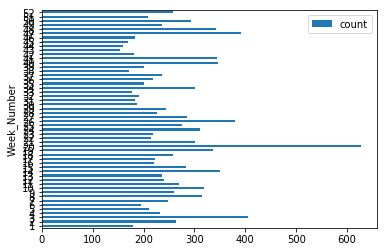

In [5]:
ordersPerWeek.index.name = 'Week_Number'
ordersPerWeek.reset_index(inplace=True, drop=False)
ordersPerWeek.plot.barh(x='Week_Number', y='number_of_orders', rot=0)

*Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant?*

*Answer:*
The mean order values for gender=0 and gender=1 are 363.89 & 350.70 respectively. To see if the difference is significant, I have performed t-testing/null hypothesis to check for p-value with 95% confidence. Meaning alpha(threshold) = 0.05. We can see from the results that p-value = 0.04816 lesser than 0.05 i.e. threshold value. Therefore, with 95% confidence I can reject this hypothesis meaning, the difference is not significant.

*Assuming a single gender prediction was made for each customer, generate a confusion matrix for predicted gender. What does the confusion matrix tell you about the quality of the predictions?*

*Answer:*
Here, as we are assuming single gender prediction case is considered (I have considered gender prediction = 1 for all), FN and TN will be equal to zero. The positive count is TP = 6712 and rest of FP = 6759.
Thereforen the metrics wil be: Accuracy: TP+TN/(TP+FP+FN+TN) => 6712/13471 = 0.4982 (49.82% accurate model) Precision: TP/(TP+FP) = Accuracy = 0.4982 (49.82% precise model) Recall: TP/(TP+FN) = 6712/6712 = 1
The quality of prediction is 50% accurate due to gender column values are not left or right skewed. Meaning equal number of gender = 0 and gender = 1 values are present. We can also notice that recall = 1 meaning our precision of classifying genders is less and is biased to capturing only gender = 1 customers. We captured all gender = 1 customers but also missed out a lot on capturing gender = 0 customers.